In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn
from sklearn import linear_model

# While language

_awaiting results_

In [33]:
# While 100 runs
df_while = pd.read_csv("../traces/benchmarks/2023_4_28_while_not_better_100_test_without_gc_change.csv")
df_while = df_while[df_while['benchmark_name'].str.startswith("while")]

In [34]:
df_while["bench_x"] = [100, 50, 20, 10, 5, 2, 1] + [0] + [100, 50, 20, 10, 5, 2, 1]

In [35]:
df_while

,benchmark_name,time_per_run_r2,time_per_run_mean,time_per_run_abs_lo_diff,time_per_run_abs_hi_diff,mWd_per_run_r2,mWd_per_run_mean,mWd_per_run_abs_lo_diff,mWd_per_run_abs_hi_diff,mjWd_per_run_r2,...,mGC_per_run_abs_hi_diff,mjGC_per_run_r2,mjGC_per_run_mean,mjGC_per_run_abs_lo_diff,mjGC_per_run_abs_hi_diff,compactions_per_run_r2,compactions_per_run_mean,compactions_per_run_abs_lo_diff,compactions_per_run_abs_hi_diff,bench_x
0,while_fib_program_100_staged,0.940884,3.516879e+08,-3.641512e+07,2.826372e+07,1.0,77694215.0,-1.043081e-07,1.490116e-07,0.999996,...,0.022190,0.999892,11.445556,-0.037105,0.022032,NaN,0.0,0.0,0.0,100
1,while_fib_program_50_staged,0.929279,1.775839e+08,-1.543911e+07,1.640471e+07,1.0,38463420.0,-5.960464e-08,6.705523e-08,0.999997,...,0.021854,0.999642,5.561111,-0.034669,0.022380,NaN,0.0,0.0,0.0,50
2,while_fib_program_20_staged,0.953386,6.365830e+07,-5.144635e+06,4.515511e+06,1.0,15002757.0,-2.235174e-08,2.793968e-08,0.999982,...,0.026818,0.998433,2.134444,-0.028925,0.018755,NaN,0.0,0.0,0.0,20
3,while_fib_program_10_staged,0.935419,2.578006e+07,-1.851345e+06,2.141787e+06,1.0,7191147.0,-1.024455e-08,1.303852e-08,0.999736,...,0.015078,0.982622,0.983333,-0.031783,0.013092,NaN,0.0,0.0,0.0,10
4,while_fib_program_5_staged,0.905837,1.531361e+07,-1.168733e+06,1.279556e+06,1.0,3286366.0,-5.122274e-09,5.587935e-09,0.999932,...,0.016383,0.956876,0.394444,-0.022620,0.019540,NaN,0.0,0.0,0.0,5
5,while_fib_program_2_staged,0.710876,3.042319e+06,-2.727102e+05,5.486048e+05,1.0,943579.0,-1.396984e-09,1.746230e-09,0.999527,...,0.023428,0.437879,0.051111,-0.032775,0.021325,NaN,0.0,0.0,0.0,2
6,while_fib_program_1_staged,0.724386,8.900483e+05,-1.158562e+05,1.812798e+05,1.0,198134.0,-3.201421e-10,3.201421e-10,0.978093,...,0.020269,NaN,0.000000,0.000000,0.000000,NaN,0.0,0.0,0.0,1
7,while_fib_program_compile,0.915567,4.170984e+06,-2.231576e+05,3.365359e+05,1.0,1011490.0,-1.513399e-09,1.862645e-09,0.999725,...,0.031263,0.914045,0.286667,-0.027039,0.024617,NaN,0.0,0.0,0.0,0
8,while_fib_program_100_run,0.977942,6.373052e+08,-3.335961e+07,3.414961e+07,1.0,133081424.0,-1.937151e-07,2.533197e-07,0.999996,...,0.029394,0.999935,26.653333,-0.035180,0.032072,NaN,0.0,0.0,0.0,100
9,while_fib_program_50_run,0.953953,3.203812e+08,-2.001747e+07,2.471369e+07,1.0,66119179.0,-8.940697e-08,1.117587e-07,0.999997,...,0.021307,0.999961,13.263333,-0.025323,0.022490,NaN,0.0,0.0,0.0,50


In [58]:
def plot_one(ax, to_plot, color, ecolor, fill_color, label, fmt="x--", fill_between=True, metric='time_per_run'):
    y_col = metric + '_mean'
    lo_err_col = metric + '_abs_lo_diff'
    hi_err_col = metric + '_abs_hi_diff'
    x = to_plot['bench_x']
    y = to_plot[y_col]
    lo_err = to_plot[lo_err_col]
    hi_err = to_plot[hi_err_col]
    error = [-lo_err, hi_err]
    if fill_between:
        ax.fill_between(x, y + lo_err, y + hi_err, color=fill_color)
    ax.errorbar(x, y, yerr=error, fmt=fmt, color=color, ecolor=ecolor, label=label)

def plot_info_for_axs(df, title, axs, linreg = True, log_scale=False, has_compile=True):
    # Setup
    # Assumes existence of bench_x column
    # fig, axs = plt.subplots(3, 1, figsize=(15, 20))

    staged = df[df['benchmark_name'].str.endswith('staged')][['benchmark_name', 'bench_x', 'time_per_run_mean', 'time_per_run_abs_lo_diff', 'time_per_run_abs_hi_diff']]
    run = df[df['benchmark_name'].str.endswith('run')][['benchmark_name', 'bench_x', 'time_per_run_mean', 'time_per_run_abs_lo_diff', 'time_per_run_abs_hi_diff']]

    # Initial analysis
    plot_one(axs[0], staged, "blue", "black", "#e3e1de", "Compiled: $t_{p_s}(d)$")
    plot_one(axs[0], run, "orange", "black", "#e3e1de", "Interpreted: $t_p(s, d)$")
    axs[0].legend()
    axs[0].set_xlabel("Dynamic Input d")
    axs[0].set_ylabel("Runtime (ns)")
    if log_scale:
        axs[0].set_yscale('log', nonposy='clip')
    # plt.plot(x, y, 'x--', color='blue', label="time/run for staged fib")
    axs[0].set_title(f"{title}: Time/run")

    # Ratio

    joined = staged.join(run.set_index('bench_x'), on="bench_x", lsuffix="_staged", rsuffix="_run")
    joined = joined[joined['benchmark_name_staged'].str[:-6] == joined['benchmark_name_run'].str[:-3]]

    axs[1].plot(joined['bench_x'], joined['time_per_run_mean_run']/joined['time_per_run_mean_staged'], "x--")
    for i,j in zip(joined['bench_x'], joined['time_per_run_mean_run']/joined['time_per_run_mean_staged']):
        axs[1].annotate(str(round(j, 2)),xy=(i,j))

    axs[1].set_xlabel("Dynamic Input d")
    axs[1].set_ylabel("Runtime ratio")
    axs[1].set_title(title +": Ratio of speedup: $t_p(s, d)/t_{p_s}(d)$")

    # Compile + run VS just run
    if has_compile:
        peval = df[df['benchmark_name'].str.endswith('compile')][['bench_x', 'time_per_run_mean', 'time_per_run_abs_lo_diff', 'time_per_run_abs_hi_diff']].iloc[0]
        new_staged = (peval + staged).append(peval)
        new_run = run # pd.concat([run, pd.DataFrame([[0, 0, 0, 0]], columns=['bench_x', 'time_per_run_mean', 'time_per_run_abs_lo_diff', 'time_per_run_abs_hi_diff'])]) 

        if linreg:
            plot_one(axs[2], new_staged, "blue", "black", "#e3e1de", "Combined run time of the staged version", fmt='.', fill_between=False)
            plot_one(axs[2], new_run, "orange", "black", "#e3e1de", "Combined run time of the non staged version", fmt='.', fill_between=False)

            model_staged = linear_model.LinearRegression()
            model_staged.fit(np.array(new_staged['bench_x']).reshape(-1, 1), new_staged['time_per_run_mean'])
            model_run = linear_model.LinearRegression()
            model_run.fit(np.array(new_run['bench_x']).reshape(-1, 1), new_run['time_per_run_mean'])

            X = np.linspace(0, 100).reshape(-1, 1)
            y_staged = model_staged.predict(X)
            y_run = model_run.predict(X)
            axs[2].plot(X, y_staged, "-", color="cyan", label="Linear model for the combined run time of the staged version")
            axs[2].plot(X, y_run, "-", color="#f7b713", label="Linear model for the run time of the non staged version")

            x_intersection = (model_run.intercept_-model_staged.intercept_) / (model_staged.coef_[0] - model_run.coef_[0])
            y_intersection = model_staged.predict([[x_intersection]])[0]
            axs[2].plot(x_intersection, y_intersection, "o", color="red", label="Intersection between the execution time of compile + run and interpret")
            axs[2].annotate(str((round(x_intersection, 2), round(y_intersection, 2))), xy=(x_intersection, y_intersection))
        else:
            plot_one(axs[2], new_staged, "blue", "black", "#e3e1de", "Combined run time of the staged version", fmt='.--', fill_between=False)
            plot_one(axs[2], new_run, "orange", "black", "#e3e1de", "Combined run time of the non staged version", fmt='.--', fill_between=False)
        axs[2].legend()
        axs[2].set_xlabel("Dynamic Input d")
        axs[2].set_ylabel("Runtime (ns)")
        axs[2].set_title(f"{title}: Time/run: Unstaged VS Code Gen + Evaluating the generated code")

    # plt.show()
def hook(fig, axs):
    ...

def plot_info_for(df, title, linreg=True, log_scale=False, has_compile=True, figsize=(15, 20), hook = hook):
    fig, axs = plt.subplots(3, 1, figsize=figsize)
    hook(fig, axs)
    plot_info_for_axs(df, title, axs, linreg, log_scale=log_scale, has_compile=has_compile)
    plt.show()


In [59]:
plot_info_for(df_while, "While Interpreter (200 runs)")

NameError: name 'df_while' is not defined

# Flowchart

In [60]:
# Flowchart 100 runs
df_fc = pd.read_csv("../traces/benchmarks/2023_4_29_while_flowchart_better_fib_100.csv")
df_fc = df_fc[df_fc['benchmark_name'].str.startswith("flowchart")]
df_fc["bench_x"] = [100, 50, 20, 10, 5, 2, 1] + [0] + [100, 50, 20, 10, 5, 2, 1]
df_fc

,benchmark_name,time_per_run_r2,time_per_run_mean,time_per_run_abs_lo_diff,time_per_run_abs_hi_diff,mWd_per_run_r2,mWd_per_run_mean,mWd_per_run_abs_lo_diff,mWd_per_run_abs_hi_diff,mjWd_per_run_r2,...,mGC_per_run_abs_hi_diff,mjGC_per_run_r2,mjGC_per_run_mean,mjGC_per_run_abs_lo_diff,mjGC_per_run_abs_hi_diff,compactions_per_run_r2,compactions_per_run_mean,compactions_per_run_abs_lo_diff,compactions_per_run_abs_hi_diff,bench_x
0,flowchart_fib_program_100_staged,0.961198,9.936063e+08,-6.192952e+07,6.263926e+07,1.0,200277475.0,-2.980232e-07,3.576279e-07,1.000000,...,0.218659,0.997793,35.220000,-0.241412,0.478529,NaN,0.0,0.0,0.0,100
1,flowchart_fib_program_50_staged,0.924716,4.343427e+08,-3.665432e+07,4.728251e+07,1.0,98646444.0,-1.490116e-07,1.639128e-07,1.000000,...,0.059787,0.999560,23.865556,-0.074448,0.130917,NaN,0.0,0.0,0.0,50
2,flowchart_fib_program_20_staged,0.944156,1.415185e+08,-1.152503e+07,6.480343e+06,1.0,37748717.0,-4.470348e-08,7.450581e-08,1.000000,...,0.019401,0.999898,11.266667,-0.019313,0.033166,NaN,0.0,0.0,0.0,20
3,flowchart_fib_program_10_staged,0.908957,1.100189e+08,-1.064962e+07,8.369396e+06,1.0,17458381.0,-1.862645e-08,3.725290e-08,1.000000,...,0.022032,0.999753,5.925556,-0.017529,0.027086,NaN,0.0,0.0,0.0,10
4,flowchart_fib_program_5_staged,0.917288,4.405476e+07,-3.953128e+06,3.765308e+06,1.0,7314180.0,-1.024455e-08,1.303852e-08,0.999999,...,0.019815,0.998967,2.683333,-0.018116,0.022242,NaN,0.0,0.0,0.0,5
5,flowchart_fib_program_2_staged,0.571510,3.937302e+06,-5.984244e+05,1.007163e+06,1.0,969634.0,-1.280569e-09,1.746230e-09,0.999993,...,0.017710,0.956437,0.374444,-0.023831,0.017856,NaN,0.0,0.0,0.0,2
6,flowchart_fib_program_1_staged,0.844946,4.650307e+06,-7.284359e+05,7.096378e+05,1.0,969634.0,-1.629815e-09,1.746230e-09,0.999993,...,0.017227,0.956437,0.374444,-0.024868,0.018134,NaN,0.0,0.0,0.0,1
7,flowchart_fib_program_compile,0.906097,2.556082e+07,-1.849402e+06,2.790428e+06,1.0,6074272.0,-8.381903e-09,1.117587e-08,0.999996,...,0.016030,0.999469,3.104444,-0.013243,0.020740,NaN,0.0,0.0,0.0,0
8,flowchart_fib_program_100_run,0.878369,2.306460e+09,-1.840686e+08,2.806605e+08,1.0,407133257.0,-6.556511e-07,7.152557e-07,1.000000,...,0.468788,0.994780,48.422222,-0.509418,0.951354,NaN,0.0,0.0,0.0,100
9,flowchart_fib_program_50_run,0.968744,9.932639e+08,-6.283862e+07,5.865756e+07,1.0,200039961.0,-2.682209e-07,3.576279e-07,1.000000,...,0.217857,0.998018,37.807778,-0.210405,0.437043,NaN,0.0,0.0,0.0,50


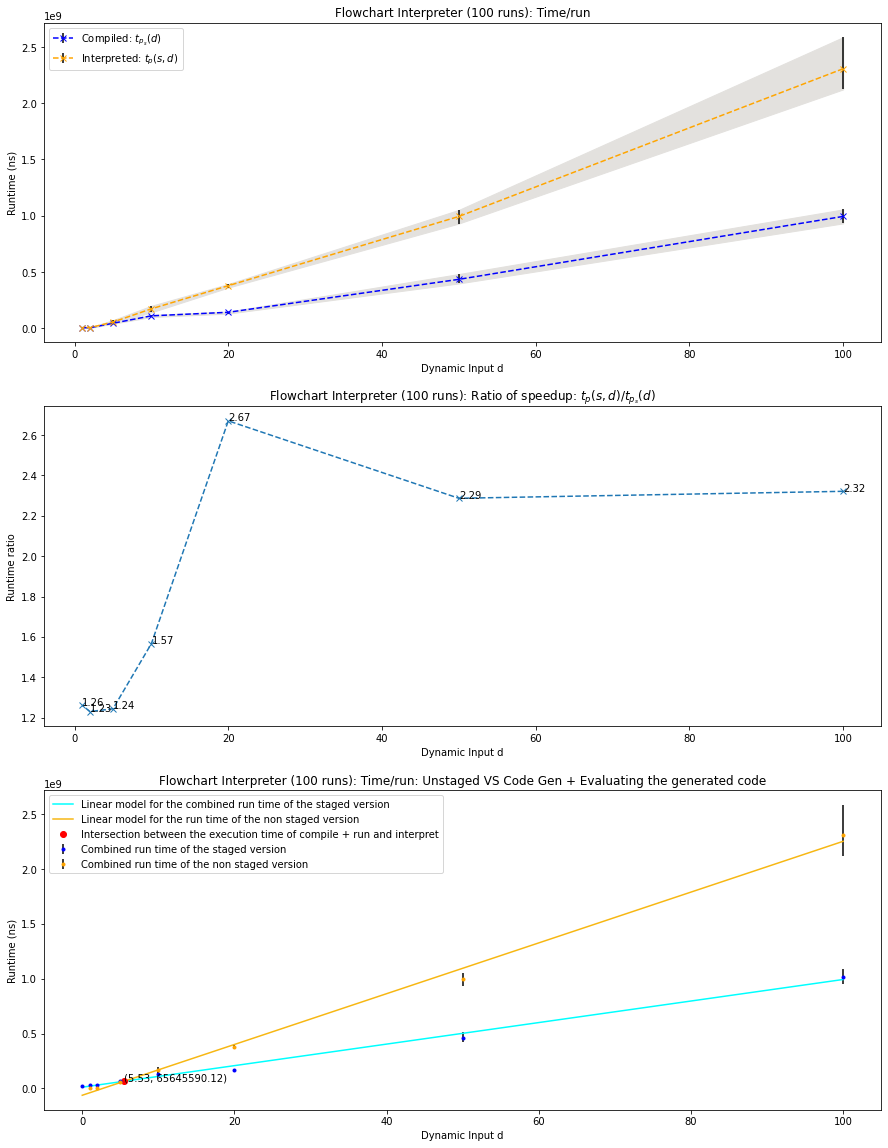

In [61]:
plot_info_for(df_fc, "Flowchart Interpreter (100 runs)")

# Conv

In [62]:
df_conv = pd.read_csv("../traces/benchmarks/20230328_conv_run_1000.csv")
df_conv =df_conv[df_conv['benchmark_name'].str.startswith("conv")]
df_conv

,benchmark_name,time_per_run_r2,time_per_run_mean,time_per_run_abs_lo_diff,time_per_run_abs_hi_diff,mWd_per_run_r2,mWd_per_run_mean,mWd_per_run_abs_lo_diff,mWd_per_run_abs_hi_diff,mjWd_per_run_r2,...,mGC_per_run_abs_lo_diff,mGC_per_run_abs_hi_diff,mjGC_per_run_r2,mjGC_per_run_mean,mjGC_per_run_abs_lo_diff,mjGC_per_run_abs_hi_diff,compactions_per_run_r2,compactions_per_run_mean,compactions_per_run_abs_lo_diff,compactions_per_run_abs_hi_diff
0,conv_200_200_staged,0.912140,2.643509e+08,-1.330481e+07,1.696787e+07,1.0,48679311.0,-6.705523e-08,9.685755e-08,1.000000,...,-0.005513,0.006408,0.999858,12.298507,-0.009709,0.013585,NaN,0.0,0.0,0.0
1,conv_200_compile,0.967279,2.752541e+08,-9.568615e+06,9.938767e+06,1.0,61348075.0,-8.940697e-08,1.266599e-07,0.999999,...,-0.009847,0.014482,0.999357,13.974652,-0.021711,0.034913,NaN,0.0,0.0,0.0
2,conv_200_200_run,0.957831,5.890473e+08,-2.494248e+07,2.665128e+07,1.0,118447749.0,-1.639128e-07,2.235174e-07,1.000000,...,-0.016141,0.023659,0.998489,12.414150,-0.032842,0.048411,NaN,0.0,0.0,0.0
3,conv_100_100_staged,0.839597,5.724383e+07,-5.272775e+06,4.537058e+06,1.0,12450633.0,-1.676381e-08,2.421439e-08,1.000000,...,-0.007031,0.008209,0.999808,6.019952,-0.015856,0.018955,NaN,0.0,0.0,0.0
4,conv_100_compile,0.807654,6.472437e+07,-6.048548e+06,6.002496e+06,1.0,15866720.0,-2.421439e-08,2.980232e-08,1.000000,...,-0.006689,0.007336,0.999639,6.216152,-0.012843,0.016010,NaN,0.0,0.0,0.0
5,conv_100_100_run,0.868330,1.594832e+08,-1.124535e+07,1.097927e+07,1.0,30192814.0,-4.842877e-08,5.587935e-08,1.000000,...,-0.004025,0.004842,0.999803,8.025382,-0.009440,0.012277,NaN,0.0,0.0,0.0
6,conv_50_50_staged,0.665595,1.712068e+07,-1.531585e+06,1.490551e+06,1.0,3253935.0,-5.122274e-09,5.587935e-09,1.000000,...,-0.004625,0.004939,0.999274,2.004818,-0.008327,0.010402,NaN,0.0,0.0,0.0
7,conv_50_compile,0.578933,2.402457e+07,-5.119432e+06,5.396998e+06,1.0,4233376.0,-6.519258e-09,8.381903e-09,0.999999,...,-0.003696,0.003667,0.999696,2.030540,-0.003369,0.004605,NaN,0.0,0.0,0.0
8,conv_50_50_run,0.808418,3.462894e+07,-3.291853e+06,3.267071e+06,1.0,7842401.0,-1.117587e-08,1.490116e-08,1.000000,...,-0.006115,0.006186,0.999745,3.402409,-0.009623,0.011848,NaN,0.0,0.0,0.0
9,conv_20_20_staged,0.755679,2.596608e+06,-2.701490e+05,2.760570e+05,1.0,589189.0,-8.149073e-10,1.047738e-09,0.999995,...,-0.005928,0.004797,0.992829,0.335901,-0.004319,0.003529,NaN,0.0,0.0,0.0


Text(0.5, 1.0, 'Conv: Time/run')

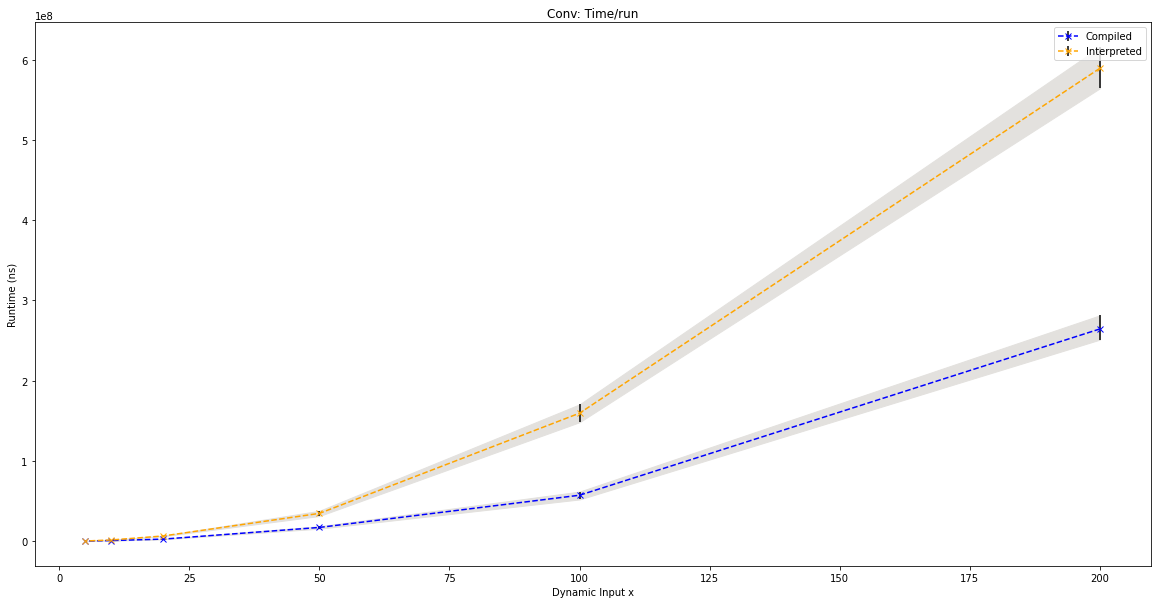

In [63]:
staged = df_conv[df_conv['benchmark_name'].str.endswith('staged')][['benchmark_name', 'time_per_run_mean', 'time_per_run_abs_lo_diff', 'time_per_run_abs_hi_diff']]
staged['bench_x'] = [200, 100, 50, 20, 10, 5]
run = df_conv[df_conv['benchmark_name'].str.endswith('run')][['benchmark_name', 'time_per_run_mean', 'time_per_run_abs_lo_diff', 'time_per_run_abs_hi_diff']]
run['bench_x'] = [200, 100, 50, 20, 10, 5]
fig, axs = plt.subplots(1, 1, figsize=(20, 10))
plot_one(axs, staged, "blue", "black", "#e3e1de", "Compiled")
plot_one(axs, run, "orange", "black", "#e3e1de", "Interpreted")
axs.legend()
axs.set_xlabel("Dynamic Input x")
axs.set_ylabel("Runtime (ns)")
# plt.plot(x, y, 'x--', color='blue', label="time/run for staged fib")
axs.set_title("Conv: Time/run")

# Failed Pow

In [64]:
df_pb = pd.read_csv("../traces/benchmarks/2023_4_30_failed_stage_additive_2.csv")


In [65]:
df_pb

,benchmark_name,time_per_run_r2,time_per_run_mean,time_per_run_abs_lo_diff,time_per_run_abs_hi_diff,mWd_per_run_r2,mWd_per_run_mean,mWd_per_run_abs_lo_diff,mWd_per_run_abs_hi_diff,mjWd_per_run_r2,...,mGC_per_run_abs_lo_diff,mGC_per_run_abs_hi_diff,mjGC_per_run_r2,mjGC_per_run_mean,mjGC_per_run_abs_lo_diff,mjGC_per_run_abs_hi_diff,compactions_per_run_r2,compactions_per_run_mean,compactions_per_run_abs_lo_diff,compactions_per_run_abs_hi_diff
0,pow_bad_10_2000_staged,0.667315,1.020335e+07,-692772.316977,696088.928099,1.0,3160116.0,-1.210719e-08,4.656613e-09,0.999999,...,-0.000859,0.000817,0.999826,0.773107,-0.000829,0.000802,NaN,0.0,0.0,0.0
1,pow_bad_10_1000_staged,0.743163,6.297505e+06,-417771.632227,455584.373740,1.0,1589116.0,-5.587935e-09,3.026798e-09,0.999993,...,-0.000813,0.000772,0.999571,0.450083,-0.000768,0.000726,NaN,0.0,0.0,0.0
2,pow_bad_10_500_staged,0.756899,2.566654e+06,-157983.457981,152737.916767,1.0,803206.0,-3.725290e-09,5.820766e-10,0.999965,...,-0.000824,0.000708,0.998831,0.233990,-0.000637,0.000634,NaN,0.0,0.0,0.0
3,pow_bad_10_200_staged,0.718730,9.667760e+05,-65995.456648,61638.922494,1.0,331906.0,-1.338776e-09,3.492460e-10,0.999876,...,-0.000838,0.000733,0.985796,0.071148,-0.000695,0.000608,NaN,0.0,0.0,0.0
4,pow_bad_10_100_staged,0.702615,3.925146e+05,-37586.971710,33823.062714,1.0,174806.0,-6.984919e-10,2.328306e-10,0.996656,...,-0.000829,0.000700,0.894380,0.021589,-0.000665,0.000629,NaN,0.0,0.0,0.0
5,pow_bad_10_50_staged,0.513693,2.542850e+05,-17591.198061,17708.641352,1.0,96244.0,-3.929017e-10,1.164153e-10,0.998429,...,-0.000683,0.000680,NaN,0.000000,0.000000,0.000000,NaN,0.0,0.0,0.0
6,pow_bad_10_20_staged,0.619975,1.917217e+05,-20459.882282,21906.212706,1.0,49114.0,-1.746230e-10,8.003553e-11,0.988377,...,-0.000733,0.000641,NaN,0.000000,0.000000,0.000000,NaN,0.0,0.0,0.0
7,pow_bad_10_10_staged,0.597031,5.622134e+04,-6391.060048,7120.118478,1.0,33404.0,-1.236913e-10,5.093170e-11,0.990514,...,-0.000686,0.000599,NaN,0.000000,0.000000,0.000000,NaN,0.0,0.0,0.0
8,pow_bad_10_5_staged,0.101697,6.322320e+04,-6757.454642,7712.936426,1.0,25549.0,-9.458745e-11,4.001777e-11,0.987162,...,-0.000683,0.000629,NaN,0.000000,0.000000,0.000000,NaN,0.0,0.0,0.0
9,pow_bad_10_2_staged,0.717177,8.495061e+04,-6007.116058,6729.552473,1.0,20836.0,-5.820766e-11,5.093170e-11,0.963427,...,-0.000711,0.000636,NaN,0.000000,0.000000,0.000000,NaN,0.0,0.0,0.0


In [66]:
df_pb["bench_x"] = [2000, 1000, 500, 200, 100, 50, 20, 10, 5, 2, 1] + [0] + [2000, 1000, 500, 200, 100, 50, 20, 10, 5, 2, 1]

In [67]:
df_pb

,benchmark_name,time_per_run_r2,time_per_run_mean,time_per_run_abs_lo_diff,time_per_run_abs_hi_diff,mWd_per_run_r2,mWd_per_run_mean,mWd_per_run_abs_lo_diff,mWd_per_run_abs_hi_diff,mjWd_per_run_r2,...,mGC_per_run_abs_hi_diff,mjGC_per_run_r2,mjGC_per_run_mean,mjGC_per_run_abs_lo_diff,mjGC_per_run_abs_hi_diff,compactions_per_run_r2,compactions_per_run_mean,compactions_per_run_abs_lo_diff,compactions_per_run_abs_hi_diff,bench_x
0,pow_bad_10_2000_staged,0.667315,1.020335e+07,-692772.316977,696088.928099,1.0,3160116.0,-1.210719e-08,4.656613e-09,0.999999,...,0.000817,0.999826,0.773107,-0.000829,0.000802,NaN,0.0,0.0,0.0,2000
1,pow_bad_10_1000_staged,0.743163,6.297505e+06,-417771.632227,455584.373740,1.0,1589116.0,-5.587935e-09,3.026798e-09,0.999993,...,0.000772,0.999571,0.450083,-0.000768,0.000726,NaN,0.0,0.0,0.0,1000
2,pow_bad_10_500_staged,0.756899,2.566654e+06,-157983.457981,152737.916767,1.0,803206.0,-3.725290e-09,5.820766e-10,0.999965,...,0.000708,0.998831,0.233990,-0.000637,0.000634,NaN,0.0,0.0,0.0,500
3,pow_bad_10_200_staged,0.718730,9.667760e+05,-65995.456648,61638.922494,1.0,331906.0,-1.338776e-09,3.492460e-10,0.999876,...,0.000733,0.985796,0.071148,-0.000695,0.000608,NaN,0.0,0.0,0.0,200
4,pow_bad_10_100_staged,0.702615,3.925146e+05,-37586.971710,33823.062714,1.0,174806.0,-6.984919e-10,2.328306e-10,0.996656,...,0.000700,0.894380,0.021589,-0.000665,0.000629,NaN,0.0,0.0,0.0,100
5,pow_bad_10_50_staged,0.513693,2.542850e+05,-17591.198061,17708.641352,1.0,96244.0,-3.929017e-10,1.164153e-10,0.998429,...,0.000680,NaN,0.000000,0.000000,0.000000,NaN,0.0,0.0,0.0,50
6,pow_bad_10_20_staged,0.619975,1.917217e+05,-20459.882282,21906.212706,1.0,49114.0,-1.746230e-10,8.003553e-11,0.988377,...,0.000641,NaN,0.000000,0.000000,0.000000,NaN,0.0,0.0,0.0,20
7,pow_bad_10_10_staged,0.597031,5.622134e+04,-6391.060048,7120.118478,1.0,33404.0,-1.236913e-10,5.093170e-11,0.990514,...,0.000599,NaN,0.000000,0.000000,0.000000,NaN,0.0,0.0,0.0,10
8,pow_bad_10_5_staged,0.101697,6.322320e+04,-6757.454642,7712.936426,1.0,25549.0,-9.458745e-11,4.001777e-11,0.987162,...,0.000629,NaN,0.000000,0.000000,0.000000,NaN,0.0,0.0,0.0,5
9,pow_bad_10_2_staged,0.717177,8.495061e+04,-6007.116058,6729.552473,1.0,20836.0,-5.820766e-11,5.093170e-11,0.963427,...,0.000636,NaN,0.000000,0.000000,0.000000,NaN,0.0,0.0,0.0,2


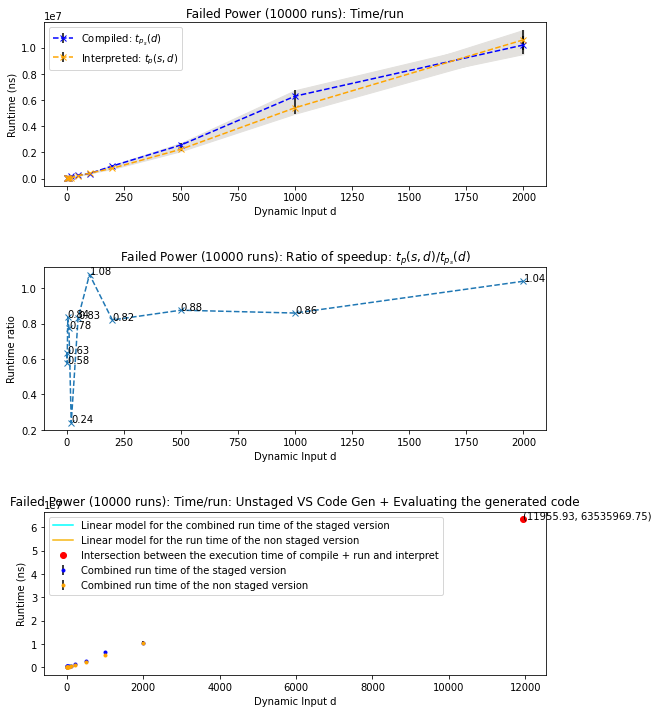

In [74]:
def hook(fig, axs):
    fig.subplots_adjust(hspace=0.5)

plot_info_for(df_pb, "Failed Power (10000 runs)", figsize=(9, 12), hook=(hook))